In [1]:
###### Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:

df = pd.read_csv(r"C:\Users\Mounishwar reddy\OneDrive\Desktop\Int\Project\healthcare-dataset-stroke-data.csv", header=0)

# Copy to back-up file

df_BK = df.copy()

# display first 5 records

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(missing_values=np.nan)

# Fill the missing values for 'Driver_Age'

df['bmi'] = imputer_knn.fit_transform(df[['bmi']])

In [6]:
#Duplicates
df.duplicated().sum()


0

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   104
bmi                   419
avg_glucose_level    3979
id                   5110
dtype: int64

In [9]:
# Binarizer
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
df['ever_married'] = LB.fit_transform(df['ever_married'])
df['Residence_type'] = LB.fit_transform(df['Residence_type'])


# Display the first 5 records 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['gender']=LE.fit_transform(df['gender'])
df['smoking_status']=LE.fit_transform(df['smoking_status'])
df['work_type']=LE.fit_transform(df['work_type'])


df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [10]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [11]:
df['stroke']=df['stroke'].astype('category')
df['age']=df['age'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   int32   
 2   age                5110 non-null   int32   
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   int32   
 6   work_type          5110 non-null   int32   
 7   Residence_type     5110 non-null   int32   
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   int32   
 11  stroke             5110 non-null   category
dtypes: category(1), float64(2), int32(6), int64(3)
memory usage: 324.6 KB


In [13]:
df=df.drop(['id'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   int32   
 1   age                5110 non-null   int32   
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   int32   
 5   work_type          5110 non-null   int32   
 6   Residence_type     5110 non-null   int32   
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   int32   
 10  stroke             5110 non-null   category
dtypes: category(1), float64(2), int32(6), int64(2)
memory usage: 284.7 KB


In [15]:
IndepVar = []
for col in df.columns:
    if col!='stroke':
        IndepVar.append(col)
TargetVar='stroke'
x=df[IndepVar]
y=df[TargetVar]

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [28]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as â€˜Scalingâ€™

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [30]:
# Scaling the features by using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1)) 
x_train = mmscaler.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = mmscaler.fit_transform(x_test) 
x_test = pd.DataFrame(x_test)

In [19]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

count = df.stroke.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] /count[1], 2), ': 1')
print('Total records', len(df))

Class 0: 4861
Class 1: 249
Proportion: 19.52 : 1
Total records 5110


In [20]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(5590, 10)
(5590,)


In [21]:
ros = RandomOverSampler(sampling_strategy=1)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

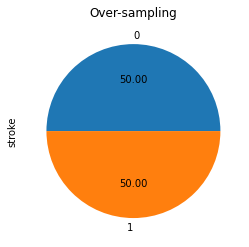

In [22]:
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [23]:
Results = pd.read_csv(r"C:\Users\Mounishwar reddy\OneDrive\Desktop\Int\HTResults1.csv", header=0)
Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0   89]
 [   0 1444]]
Outcome values : 
 0 89 0 1444
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy : 94.2 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


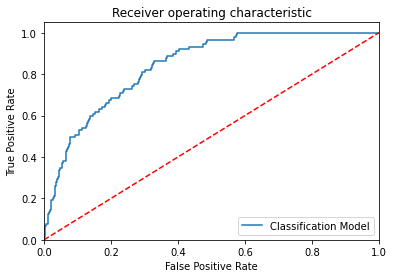

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  20   69]
 [  67 1377]]
Outcome values : 
 20 69 67 1377
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.22      0.23        89
           0       0.95      0.95      0.95      1444

    accuracy                           0.91      1533
   macro avg       0.59      0.59      0.59      1533
weighted avg       0.91      0.91      0.91      1533

Accuracy : 91.1 %
Precision : 23.0 %
Recall : 22.5 %
F1 Score : 0.227
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 59.0 %
roc_auc_score: 0.589


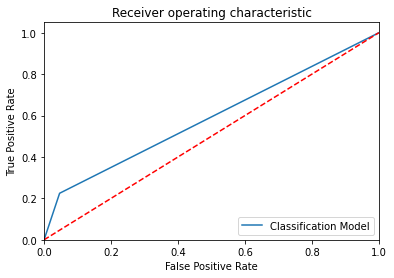

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   0   89]
 [   1 1443]]
Outcome values : 
 0 89 1 1443
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy : 94.1 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


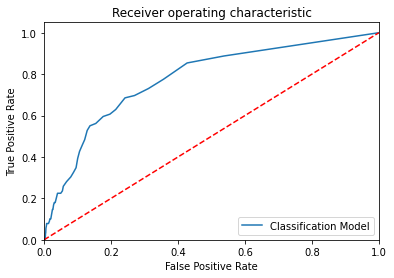

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[   2   87]
 [   7 1437]]
Outcome values : 
 2 87 7 1437
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.02      0.04        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.58      0.51      0.50      1533
weighted avg       0.90      0.94      0.91      1533

Accuracy : 93.9 %
Precision : 22.2 %
Recall : 2.2 %
F1 Score : 0.041
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 50.8 %
roc_auc_score: 0.509


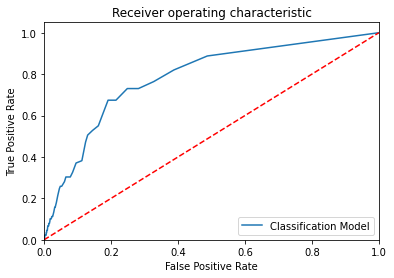

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[   0   89]
 [   1 1443]]
Outcome values : 
 0 89 1 1443
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy : 94.1 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


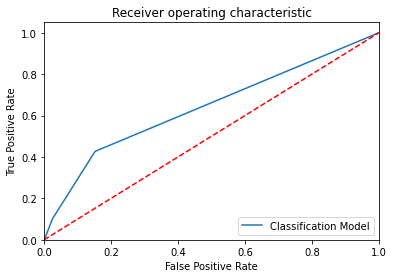

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0   89]
 [   0 1444]]
Outcome values : 
 0 89 0 1444
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy : 94.2 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


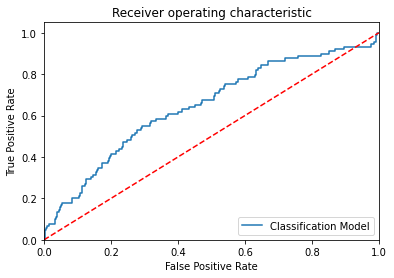

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[   4   85]
 [   5 1439]]
Outcome values : 
 4 85 5 1439
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.04      0.08        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.69      0.52      0.53      1533
weighted avg       0.92      0.94      0.92      1533

Accuracy : 94.1 %
Precision : 44.4 %
Recall : 4.5 %
F1 Score : 0.082
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 52.1 %
roc_auc_score: 0.521


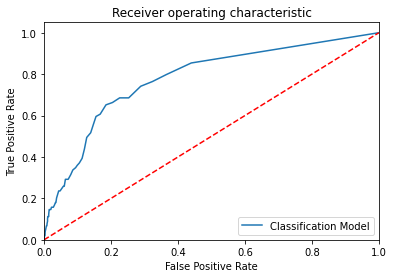

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[   0   89]
 [   8 1436]]
Outcome values : 
 0 89 8 1436
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           0       0.94      0.99      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy : 93.7 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 49.7 %
roc_auc_score: 0.497


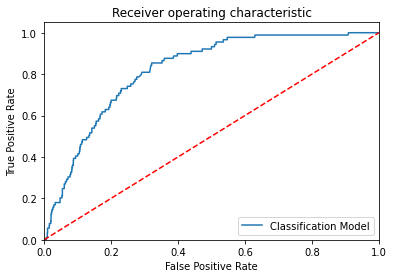

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[   4   85]
 [   4 1440]]
Outcome values : 
 4 85 4 1440
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.04      0.08        89
           0       0.94      1.00      0.97      1444

    accuracy                           0.94      1533
   macro avg       0.72      0.52      0.53      1533
weighted avg       0.92      0.94      0.92      1533

Accuracy : 94.2 %
Precision : 50.0 %
Recall : 4.5 %
F1 Score : 0.082
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 52.1 %
roc_auc_score: 0.521


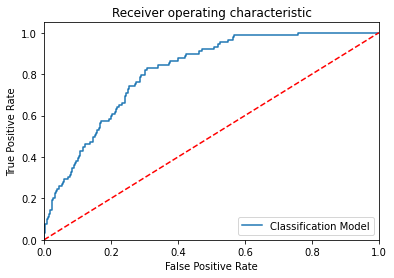

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  35   54]
 [ 135 1309]]
Outcome values : 
 35 54 135 1309
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.39      0.27        89
           0       0.96      0.91      0.93      1444

    accuracy                           0.88      1533
   macro avg       0.58      0.65      0.60      1533
weighted avg       0.92      0.88      0.89      1533

Accuracy : 87.7 %
Precision : 20.6 %
Recall : 39.3 %
F1 Score : 0.27
Specificity or True Negative Rate : 90.7 %
Balanced Accuracy : 65.0 %
roc_auc_score: 0.65


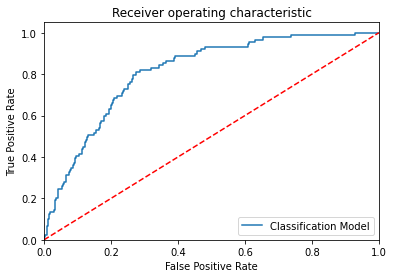

-----------------------------------------------------------------------------------------------------


In [24]:
# Build the Calssification models and compare the results
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms


MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [25]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,89,0,1444,0.942,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),20,69,67,1377,0.911,0.230,0.225,0.227,0.954,0.180,0.589160,0.590
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0,89,1,1443,0.941,0.000,0.000,0.000,0.999,-0.006,0.499654,0.500
3,"(ExtraTreeClassifier(random_state=1267447305),...",2,87,7,1437,0.939,0.222,0.022,0.041,0.995,0.054,0.508812,0.508
4,KNeighborsClassifier(),0,89,1,1443,0.941,0.000,0.000,0.000,0.999,-0.006,0.499654,0.500
5,SVC(probability=True),0,89,0,1444,0.942,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
6,(DecisionTreeClassifier(random_state=13002772)...,4,85,5,1439,0.941,0.444,0.045,0.082,0.997,0.127,0.520741,0.521
7,([DecisionTreeRegressor(criterion='friedman_ms...,0,89,8,1436,0.937,0.000,0.000,0.000,0.994,-0.018,0.497230,0.497
8,LGBMClassifier(),4,85,4,1440,0.942,0.500,0.045,0.082,0.997,0.137,0.521087,0.521
9,GaussianNB(),35,54,135,1309,0.877,0.206,0.393,0.270,0.907,0.223,0.649884,0.650
